# **1. Perkenalan Dataset**


Dataset ini berasal dari **UCI Machine Learning** Repository dan berisi data medis pasien seperti usia, tekanan darah, kolesterol, dan hasil tes jantung. Tujuan dari analisis ini adalah untuk memprediksi apakah seseorang memiliki penyakit jantung atau tidak berdasarkan fitur-fitur tersebut.

In [80]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


# **2. Import Library**

In [81]:
# Import pustaka yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder

# **3. Memuat Dataset**

In [82]:
# Load dataset
df = pd.read_csv('heart.csv')

# Tampilkan 5 baris pertama
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# **4. Exploratory Data Analysis (EDA)**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


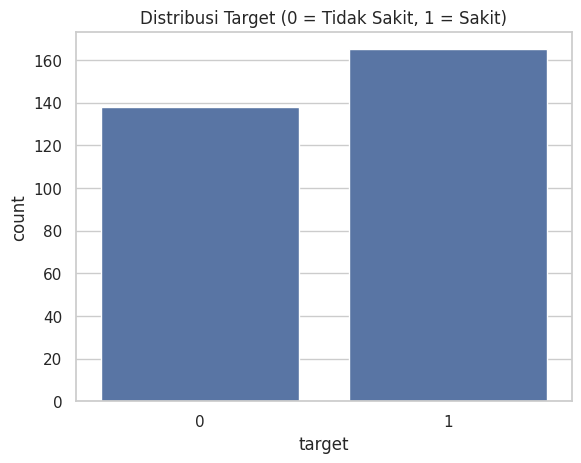

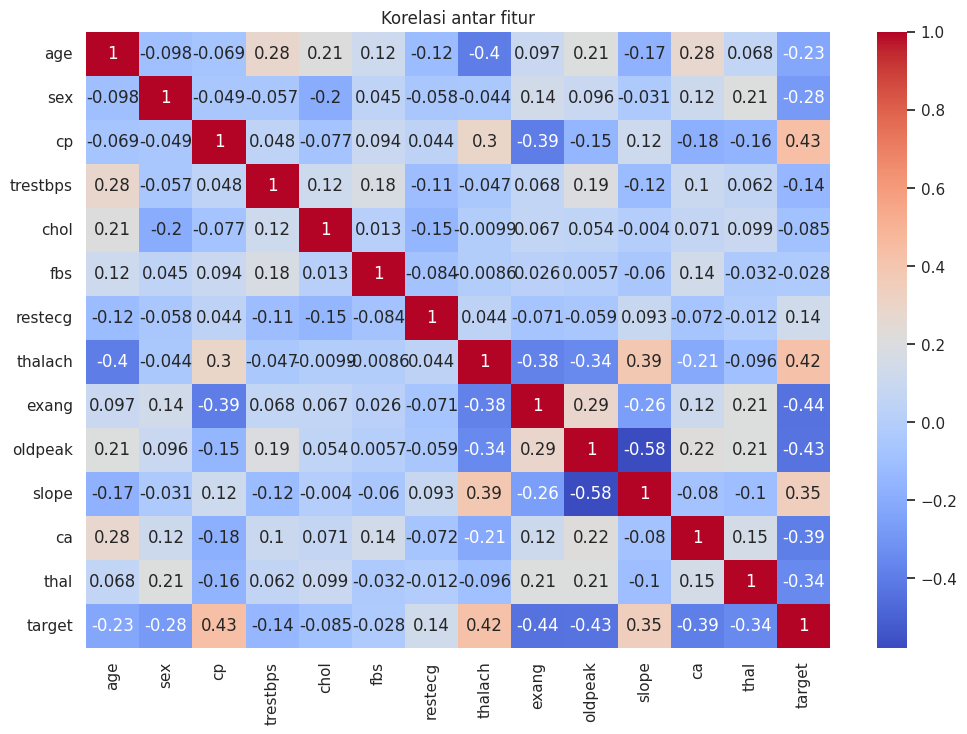

In [83]:
# Informasi umum dataset
df.info()

# Statistik deskriptif
df.describe()

# Distribusi target
sns.countplot(x='target', data=df)
plt.title('Distribusi Target (0 = Tidak Sakit, 1 = Sakit)')
plt.show()

# Korelasi antar fitur
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antar fitur')
plt.show()

# **5. Data Preprocessing**

In [84]:
# Tangani missing values (jika ada)
df.fillna(df.median(), inplace=True)

# Hapus duplikat
df.drop_duplicates(inplace=True)

# Encoding fitur kategorikal
categorical_cols = ['cp', 'restecg', 'slope', 'thal']
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Normalisasi fitur numerik
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Simpan hasil preprocessing ke folder lokal Colab
import os
output_dir = '/content/preprocessing/namadataset_preprocessing'
os.makedirs(output_dir, exist_ok=True)
df.to_csv(os.path.join(output_dir, 'heart_clean.csv'), index=False)

# Tampilkan hasil akhir
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.949794,1,3,0.764066,-0.261285,1,0,0.018826,0,1.084022,0,0,1,1
1,-1.928548,1,2,-0.091401,0.067741,0,1,1.636979,0,2.118926,0,0,2,1
2,-1.485726,0,1,-0.091401,-0.822564,0,0,0.980971,0,0.307844,2,0,2,1
3,0.174856,1,1,-0.661712,-0.203222,0,1,1.243374,0,-0.209608,2,0,2,1
4,0.285561,0,0,-0.661712,2.080602,0,1,0.587366,1,-0.382092,2,0,2,1


**Hasil dari Data Preprocessing**

In [85]:
df['target'].value_counts()

,count
target,
1,164
0,138


In [86]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [87]:
print("Jumlah baris:", len(df))

Jumlah baris: 302


In [113]:
df[num_cols].describe()

,age,trestbps,chol,thalach,oldpeak
count,3.020000e+02,3.020000e+02,3.020000e+02,3.020000e+02,3.020000e+02
mean,-2.588070e-16,-7.058372e-16,8.822964e-18,-5.646697e-16,-1.646953e-16
std,1.001660e+00,1.001660e+00,1.001660e+00,1.001660e+00,1.001660e+00
min,-2.814192e+00,-2.144521e+00,-2.332210e+00,-3.436149e+00,-8.995441e-01
25%,-7.107878e-01,-6.617119e-01,-6.870826e-01,-7.137164e-01,-8.995441e-01
50%,1.195033e-01,-9.140084e-02,-1.161266e-01,1.281605e-01,-2.096081e-01
75%,7.283833e-01,4.789102e-01,5.467629e-01,7.185677e-01,4.803280e-01
max,2.499671e+00,3.900776e+00,6.145034e+00,2.292987e+00,4.447460e+00


# **Automate File**

In [116]:
%%writefile /content/Eksperimen_SML_Luthfi-Wulandari/preprocessing/automate_Luthfi-Wulandari.py

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import os

def load_data(path):
    print("Loading dataset...")
    return pd.read_csv(path)

def clean_data(df):
    print("Cleaning data...")
    df.fillna(df.median(), inplace=True)
    df.drop_duplicates(inplace=True)
    return df

def encode_features(df, categorical_cols):
    print("Encoding categorical features...")
    encoder = LabelEncoder()
    for col in categorical_cols:
        df[col] = encoder.fit_transform(df[col])
    return df

def scale_features(df, numerical_cols):
    print("Scaling numerical features...")
    scaler = StandardScaler()
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    return df

def save_data(df, output_path):
    print(f"Saving processed data to {output_path}")
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    df.to_csv(output_path, index=False)

def main():
    input_path = 'namadataset_raw/heart.csv'
    output_path = 'preprocessing/namadataset_preprocessing/heart_clean.csv'

    categorical_cols = ['cp', 'restecg', 'slope', 'thal']
    numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

    df = load_data(input_path)
    df = clean_data(df)
    df = encode_features(df, categorical_cols)
    df = scale_features(df, numerical_cols)
    save_data(df, output_path)
    print("Preprocessing complete.")

if __name__ == "__main__":
    main()

Writing /content/Eksperimen_SML_Luthfi-Wulandari/preprocessing/automate_Luthfi-Wulandari.py
